In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
from metamod.utils import ResultsManager, two_layer_parameters_plot, single_task_plot, task_switch_weights_plot, non_linear_network_plots, plot_optimal_lr, plot_optimal_lr_loss

# Non-linear network

In [3]:
results_path = "../results/non_linear_affine_correlated_25-01-2023_15-06-06-388"
results_manager = ResultsManager(results_path)

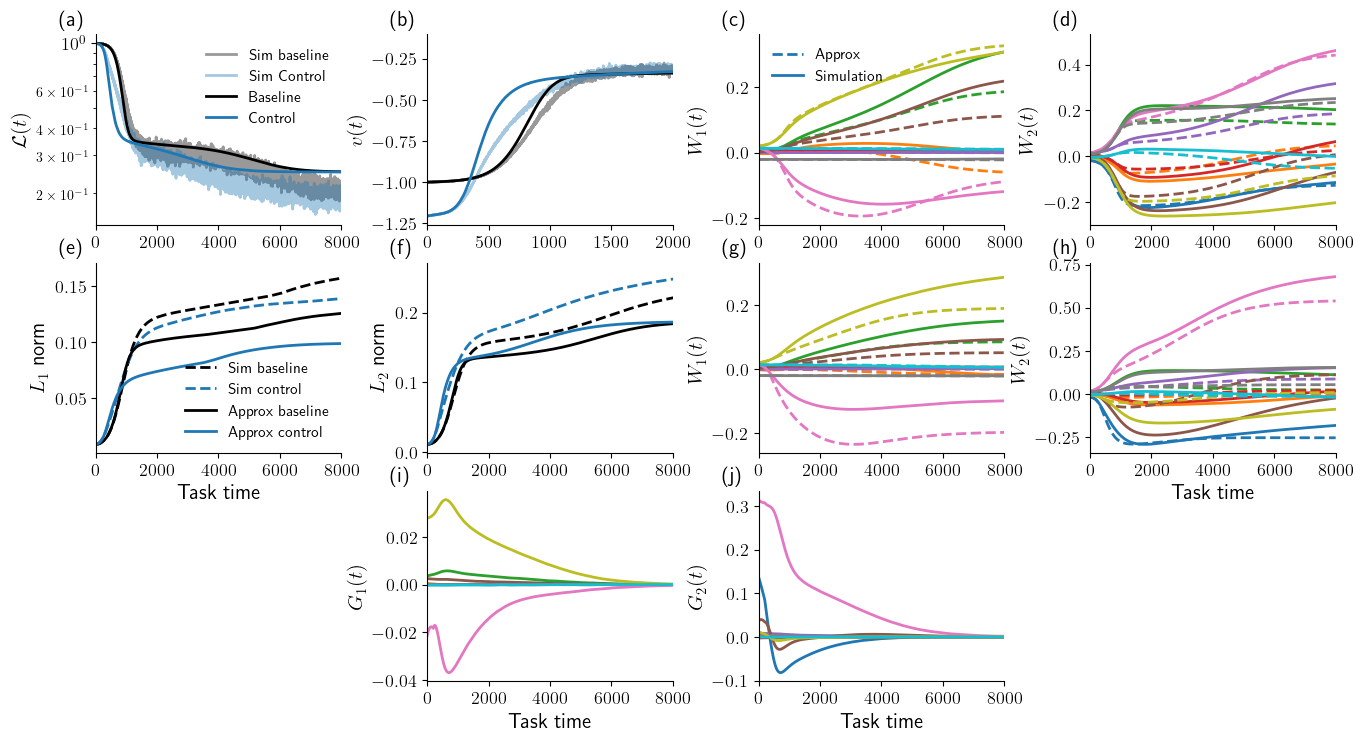

In [4]:
figsize=(8*2, 7/5*6)
fontsize = 15
line_width = 2
n_weights = 10
subplot_labels = np.array(["(a)", "(b)", "(c)", "(d)", "(e)", "(f)", "(g)", "(h)", "", "(i)", "(j)"])
xlim = (0, 8000)
xlim2 = (0, 2000)
alpha = 0.4
window_size = 200

f, ax = non_linear_network_plots(results_manager, figsize=figsize, fontsize=fontsize, line_width=line_width,
                                 n_weights=n_weights, subplot_labels=subplot_labels, xlim=xlim, xlim2=xlim2, 
                                 alpha=alpha, window_size=window_size)
f.subplots_adjust(wspace=0.35)
plt.savefig("paper_figures/non_linear_network.pdf", bbox_inches="tight")

# Weights and control signal for single task runs

In [5]:
results_path = "../results/single_task_more_iters/run_id_0_AffineCorrelatedGaussian_19-01-2023_00-00-36-142"
result_manager = ResultsManager(results_path)

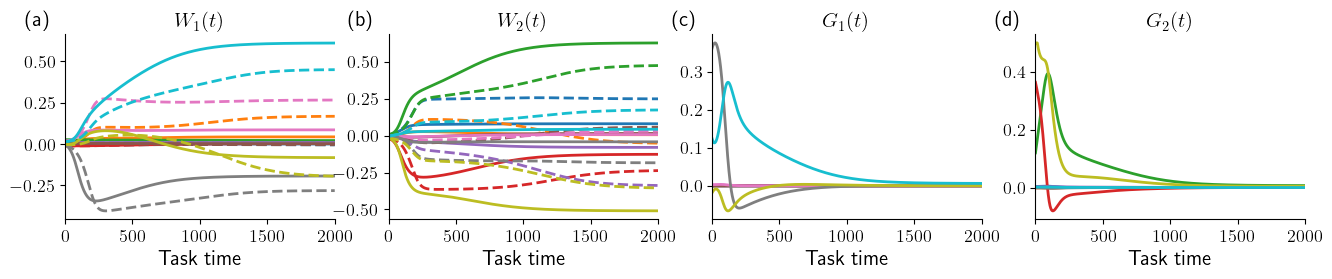

In [6]:
figsize = (16, 6/5*2)
fontsize = 15
line_width = 2
n_weights = 10
subplot_labels = np.array([["(a)", "(b)"], ["(c)", "(d)"]])
subplot_labels = subplot_labels.flatten()
xlim = (0, 2000)

two_layer_parameters_plot(result_manager, figsize=figsize, fontsize=fontsize, line_width=line_width, 
                          n_weights=n_weights, subplot_labels=subplot_labels, xlim=xlim)

plt.savefig("paper_figures/single_task_gaussian_params.pdf", bbox_inches="tight")

In [7]:
results_path = "../results/single_task_more_iters/run_id_0_Semantic_19-01-2023_07-24-36-341"
result_manager = ResultsManager(results_path)

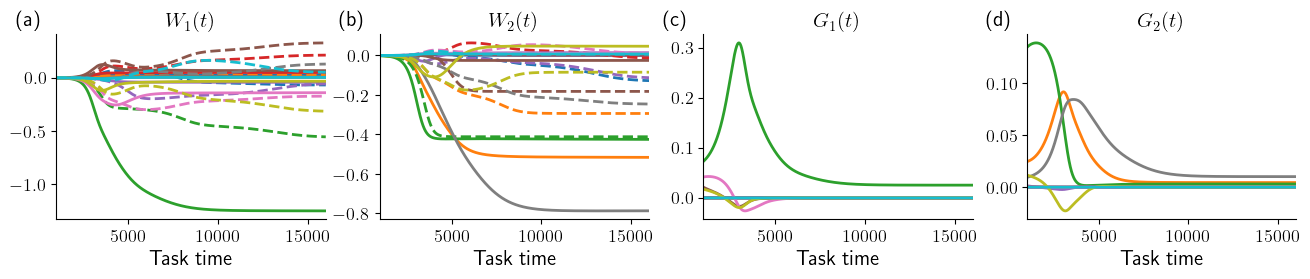

In [8]:
figsize = (16, 6/5*2)
fontsize = 15
line_width = 2
n_weights = 10
subplot_labels = np.array([["(a)", "(b)"], ["(c)", "(d)"]])
subplot_labels = subplot_labels.flatten()
xlim = (1000, 16000)

two_layer_parameters_plot(result_manager, figsize=figsize, fontsize=fontsize, line_width=line_width, 
                          n_weights=n_weights, subplot_labels=subplot_labels, xlim=xlim)

plt.savefig("paper_figures/single_task_semantic_params.pdf", bbox_inches="tight")

In [9]:
results_path = "../results/single_task_more_iters/run_id_1_MNIST_19-01-2023_07-18-15-742"
result_manager = ResultsManager(results_path)

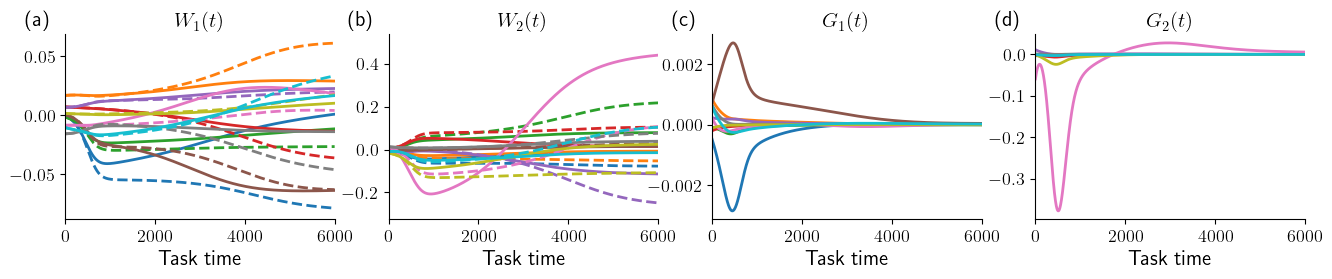

In [10]:
figsize = (16, 6/5*2)
fontsize = 15
line_width = 2
n_weights = 10
subplot_labels = np.array([["(a)", "(b)"], ["(c)", "(d)"]])
subplot_labels = subplot_labels.flatten()
xlim = (0, 6000)

two_layer_parameters_plot(result_manager, figsize=figsize, fontsize=fontsize, line_width=line_width, 
                          n_weights=n_weights, subplot_labels=subplot_labels, xlim=xlim)

plt.savefig("paper_figures/single_task_mnist_params.pdf", bbox_inches="tight")

# Additional results task switch

In [11]:
results_path = "../results/task_switch_less_reg_longer/slow_switch_run0_AffineCorrelatedGaussian_18-01-2023_19-32-18-232"
gaussian_dir_list = glob.glob("../results/task_switch_less_reg_longer/slow_switch_run*_AffineCorrelatedGaussian*")
results = []
for result_dir in gaussian_dir_list:
    results.append(ResultsManager(result_dir))

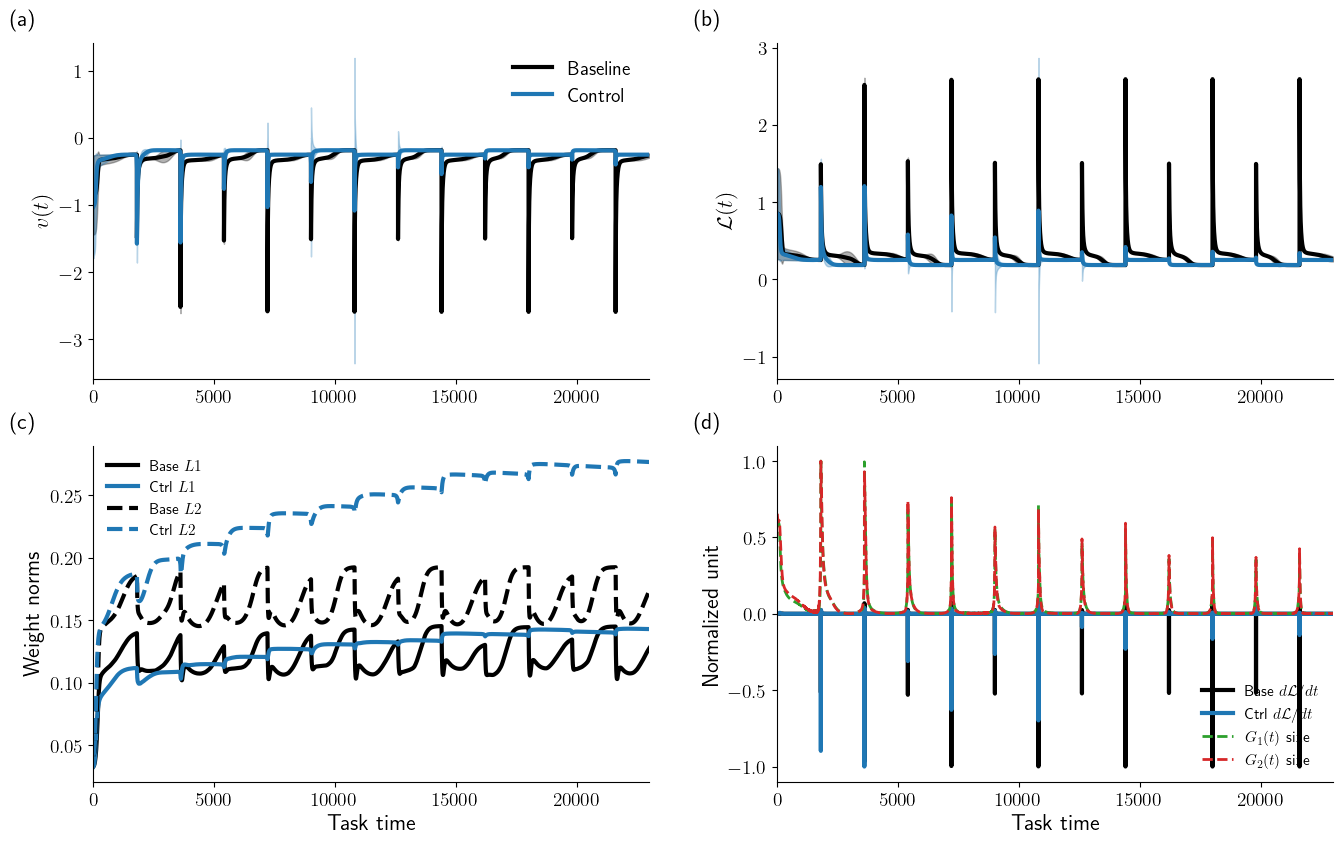

In [12]:
f, ax = plt.subplots(2, 2, figsize=(8*2, 2*6/5*4))
f.subplots_adjust(wspace=0.23)
ax = ax.flatten()
subplot_labels = np.array([["(a)", "(b)"], ["(c)", "(d)"]])
subplot_labels = subplot_labels.flatten()
ax = single_task_plot(results, ax=ax, fontsize=16, line_width=3, x_lim=(0, 23000), skip_xlabel=True, label_in_title=False, subplot_labels=subplot_labels)
plt.savefig("paper_figures/task_switch_summary.pdf", bbox_inches="tight")

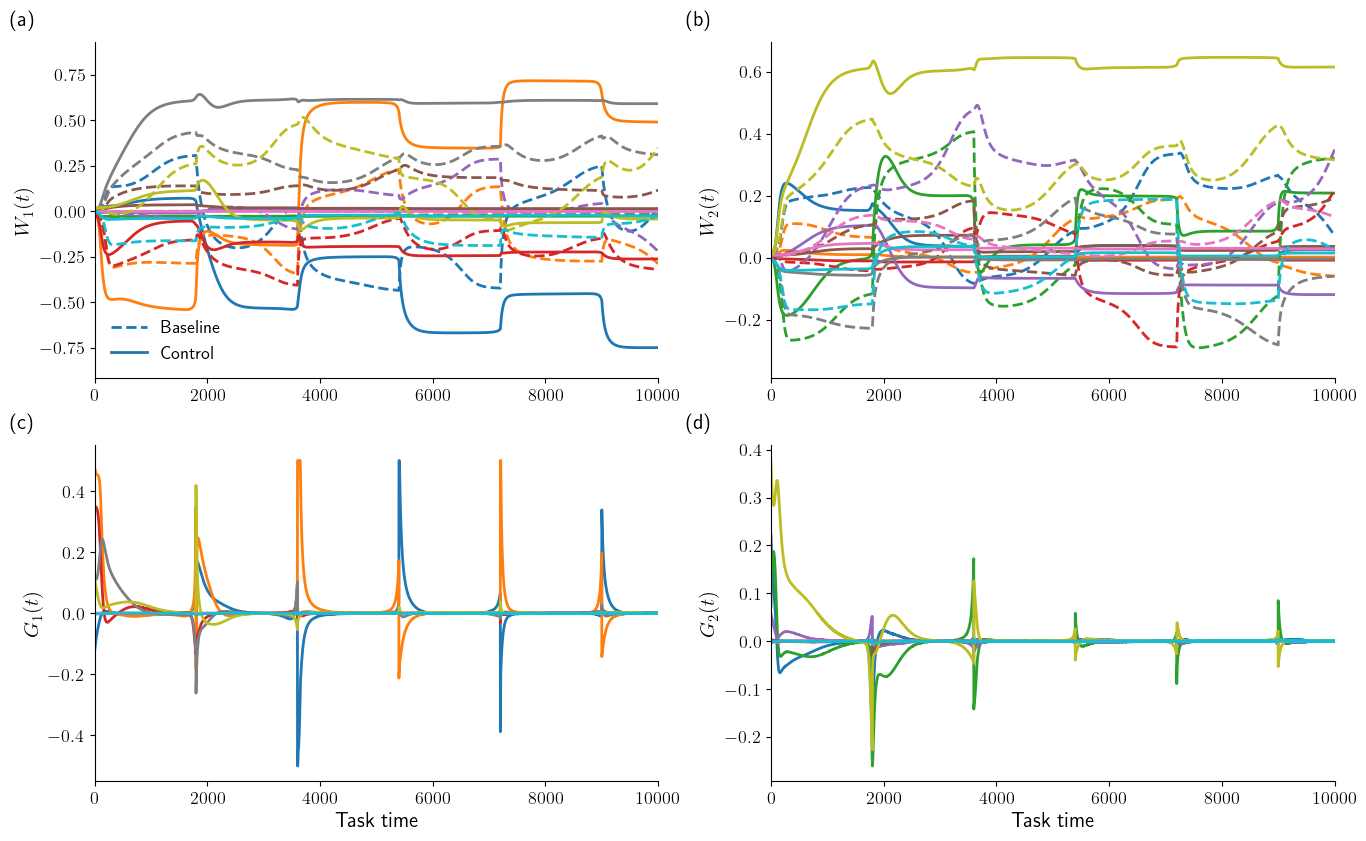

In [13]:
figsize=(8*2, 2*6/5*4)
fontsize = 15
line_width = 2
n_weights = 10
subplot_labels = np.array([["(a)", "(b)"], ["(c)", "(d)"]])
subplot_labels = subplot_labels.flatten()
xlim = (0, 10000)
result_manager = results[0]
task_switch_weights_plot(result_manager, figsize=figsize, fontsize=fontsize, line_width=line_width, 
                          n_weights=n_weights, subplot_labels=subplot_labels, xlim=xlim)
plt.savefig("paper_figures/task_switch_weights.pdf", bbox_inches="tight")

dict_keys(['fontsize', 'line_width', 'subplot_labels', 'y_label'])
False
dict_keys(['fontsize', 'line_width', 'subplot_labels', 'y_label', 'weight_legend_pos', 'disable_legend'])
True
dict_keys(['fontsize', 'line_width', 'subplot_labels', 'y_label'])
False
dict_keys(['fontsize', 'line_width', 'subplot_labels', 'y_label', 'disable_legend'])
True


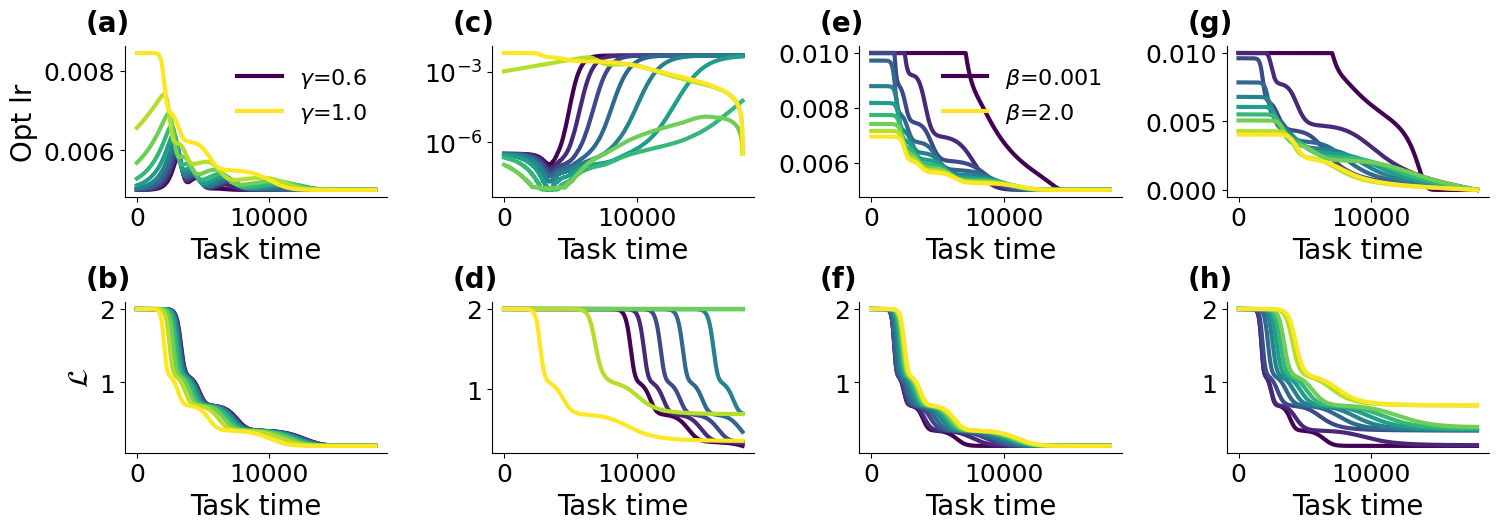

In [6]:
figsize = np.array((16, 6/5*8/2))*1.1

f, ax2 = plt.subplots(2, 4, figsize=figsize)

fontsize = 20
subplot_labels = "(a)"
y_label = "Opt lr"

""" varyng gamma, deviating from 1 """
results_path = "../results/sweep_learning_rate_v2/run_id_*_Semantic_*"
path_list = sorted(glob.glob(results_path))
spec_path_list = []
run_ids = np.arange(0, 10)
for run_id in run_ids:
    for path in path_list:
        if "run_id_"+str(run_id)+"_" in path:
            spec_path_list.append(path)
            
gammas = np.linspace(0.6, 1.0, 10, endpoint=True)

plot_optimal_lr(ax2[0, 0], spec_path_list=spec_path_list, var_sweep=gammas, var_label=r"$\gamma$",
                fontsize=fontsize, line_width=3, subplot_labels=subplot_labels, y_label=y_label)

""" varyng gamma, deviating from 0 """
weight_legend_pos = (0.5, 0.6)
disable_legend = True
subplot_labels = "(c)"
y_label = None
results_path = "../results/sweep_learning_rate_v2/run_id_*_Semantic_*"
path_list = sorted(glob.glob(results_path))
spec_path_list = []
run_ids = np.arange(10, 20)
for run_id in run_ids:
    for path in path_list:
        if "run_id_"+str(run_id)+"_" in path:
            spec_path_list.append(path)
            
gammas = np.linspace(0.6, 1.0, 10, endpoint=True)

plot_optimal_lr(ax2[0, 1], spec_path_list=spec_path_list, var_sweep=gammas, var_label=r"$\gamma$",
                fontsize=fontsize, line_width=3, subplot_labels=subplot_labels, y_label=y_label,
                weight_legend_pos=weight_legend_pos, disable_legend=disable_legend)
ax2[0, 1].set_yscale("log")

""" varyng beta, deviating from 1 """
y_label = None
results_path = "../results/sweep_learning_rate/run_id_*_Semantic_*"
path_list = sorted(glob.glob(results_path))
spec_path_list = []
run_ids = np.arange(20, 30)
for run_id in run_ids:
    for path in path_list:
        if "run_id_"+str(run_id)+"_" in path:
            spec_path_list.append(path)
            
betas = np.linspace(1e-3, 2, 10, endpoint=True)

subplot_labels = "(e)"

plot_optimal_lr(ax2[0, 2], spec_path_list=spec_path_list, var_sweep=betas, var_label=r"$\beta$",
                fontsize=fontsize, line_width=3, subplot_labels=subplot_labels, y_label=y_label)


""" varyng beta, deviating from 0 """
y_label = None
results_path = "../results/sweep_learning_rate/run_id_*_Semantic_*"
path_list = sorted(glob.glob(results_path))
spec_path_list = []
run_ids = np.arange(30, 40)
for run_id in run_ids:
    for path in path_list:
        if "run_id_"+str(run_id)+"_" in path:
            spec_path_list.append(path)
            
betas = np.linspace(1e-3, 2, 10, endpoint=True)

subplot_labels = "(g)"

plot_optimal_lr(ax2[0, 3], spec_path_list=spec_path_list, var_sweep=betas, var_label=r"$\beta$",
                fontsize=fontsize, line_width=3, subplot_labels=subplot_labels, y_label=y_label,
                disable_legend=disable_legend)

""" ############################################### """
""" ######## Plot loss ######## """
""" ############################################### """

subplot_labels = "(b)"
y_label = r"$\mathcal{L}$"

""" varyng gamma, deviating from 1 """
results_path = "../results/sweep_learning_rate_v2/run_id_*_Semantic_*"
path_list = sorted(glob.glob(results_path))
spec_path_list = []
run_ids = np.arange(0, 10)
for run_id in run_ids:
    for path in path_list:
        if "run_id_"+str(run_id)+"_" in path:
            spec_path_list.append(path)
            
gammas = np.linspace(0.6, 1.0, 10, endpoint=True)

plot_optimal_lr_loss(ax2[1, 0], spec_path_list=spec_path_list, var_sweep=gammas, var_label=r"$\gamma$",
                fontsize=fontsize, line_width=3, subplot_labels=subplot_labels, y_label=y_label,
                     disable_legend=disable_legend)

""" varyng gamma, deviating from 0 """
weight_legend_pos = (0.5, 0.6)
disable_legend = True
subplot_labels = "(d)"
y_label = None
results_path = "../results/sweep_learning_rate_v2/run_id_*_Semantic_*"
path_list = sorted(glob.glob(results_path))
spec_path_list = []
run_ids = np.arange(10, 20)
for run_id in run_ids:
    for path in path_list:
        if "run_id_"+str(run_id)+"_" in path:
            spec_path_list.append(path)
            
gammas = np.linspace(0.6, 1.0, 10, endpoint=True)

plot_optimal_lr_loss(ax2[1, 1], spec_path_list=spec_path_list, var_sweep=gammas, var_label=r"$\gamma$",
                fontsize=fontsize, line_width=3, subplot_labels=subplot_labels, y_label=y_label,
                weight_legend_pos=weight_legend_pos, disable_legend=disable_legend)

""" varyng beta, deviating from 1 """
y_label = None
results_path = "../results/sweep_learning_rate/run_id_*_Semantic_*"
path_list = sorted(glob.glob(results_path))
spec_path_list = []
run_ids = np.arange(20, 30)
for run_id in run_ids:
    for path in path_list:
        if "run_id_"+str(run_id)+"_" in path:
            spec_path_list.append(path)
            
betas = np.linspace(1e-3, 2, 10, endpoint=True)

subplot_labels = "(f)"

plot_optimal_lr_loss(ax2[1, 2], spec_path_list=spec_path_list, var_sweep=betas, var_label=r"$\beta$",
                fontsize=fontsize, line_width=3, subplot_labels=subplot_labels, y_label=y_label,
                    disable_legend=disable_legend)


""" varyng beta, deviating from 0 """
y_label = None
results_path = "../results/sweep_learning_rate/run_id_*_Semantic_*"
path_list = sorted(glob.glob(results_path))
spec_path_list = []
run_ids = np.arange(30, 40)
for run_id in run_ids:
    for path in path_list:
        if "run_id_"+str(run_id)+"_" in path:
            spec_path_list.append(path)
            
betas = np.linspace(1e-3, 2, 10, endpoint=True)

subplot_labels = "(h)"

plot_optimal_lr_loss(ax2[1, 3], spec_path_list=spec_path_list, var_sweep=betas, var_label=r"$\beta$",
                fontsize=fontsize, line_width=3, subplot_labels=subplot_labels, y_label=y_label,
                disable_legend=disable_legend)


plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.savefig("paper_v2/appendix_lr.pdf", bbox_inches="tight")